In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils import resample

# Read Data

In [2]:
path_combined_2021 = 'data/Combined_Flights_2021.csv'
path_airlines = 'data/Airlines.csv'
path_raw_2021_1 = 'data/raw/Flights_2021_1.csv'
path_airport_codes = 'data/airport-codes_csv.csv'

In [3]:
# Reading the CSV file and storing it as a DataFrame
df_combined_2021 = pd.read_csv(path_combined_2021)
df_combined_2021.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,724.0,813.0,5.0,843,-25.0,0.0,-2.0,0800-0859,2,0.0
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,940.0,1028.0,3.0,1040,-9.0,0.0,-1.0,1000-1059,2,0.0
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,1336.0,1445.0,16.0,1530,-29.0,0.0,-2.0,1500-1559,4,0.0
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,1703.0,1955.0,7.0,2010,-8.0,0.0,-1.0,2000-2059,4,0.0
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,1851.0,1900.0,3.0,1925,-22.0,0.0,-2.0,1900-1959,2,0.0


In [4]:
for column in df_combined_2021.columns:
    print(f"{column}: {df_combined_2021[column].dtype}")

FlightDate: object
Airline: object
Origin: object
Dest: object
Cancelled: bool
Diverted: bool
CRSDepTime: int64
DepTime: float64
DepDelayMinutes: float64
DepDelay: float64
ArrTime: float64
ArrDelayMinutes: float64
AirTime: float64
CRSElapsedTime: float64
ActualElapsedTime: float64
Distance: float64
Year: int64
Quarter: int64
Month: int64
DayofMonth: int64
DayOfWeek: int64
Marketing_Airline_Network: object
Operated_or_Branded_Code_Share_Partners: object
DOT_ID_Marketing_Airline: int64
IATA_Code_Marketing_Airline: object
Flight_Number_Marketing_Airline: int64
Operating_Airline: object
DOT_ID_Operating_Airline: int64
IATA_Code_Operating_Airline: object
Tail_Number: object
Flight_Number_Operating_Airline: int64
OriginAirportID: int64
OriginAirportSeqID: int64
OriginCityMarketID: int64
OriginCityName: object
OriginState: object
OriginStateFips: int64
OriginStateName: object
OriginWac: int64
DestAirportID: int64
DestAirportSeqID: int64
DestCityMarketID: int64
DestCityName: object
DestState: 

In [5]:
df_airlines = pd.read_csv(path_airlines)
df_airlines.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [6]:
df_raw_2021_1 = pd.read_csv(path_raw_2021_1)
df_raw_2021_1.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_22084/2299105374.py:1: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_2021_1 = pd.read_csv(path_raw_2021_1)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2021,1,1,2,6,2021-01-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2021,1,1,3,7,2021-01-03,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2021,1,1,4,1,2021-01-04,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2021,1,1,7,4,2021-01-07,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2021,1,1,8,5,2021-01-08,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [7]:
df = df_combined_2021.copy()

# 1. EDA of Cancelled

## 1.1 Class Imbalance

Cancelled
False    6200853
True      111018
Name: count, dtype: int64


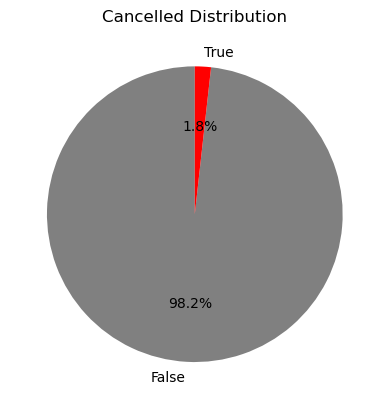

In [8]:
cancelled_counts = df_combined_2021['Cancelled'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

## 1.2 Histograms Cancelled/Not Cancelled

## 1.3 Boxplots Cancelled/Not Cancelled

## 1.4 Analyze Cat Columns

# EDA of Delayed

## 2.2 Histograms

## 2.3 Boxplots

## 2.4 Analysis of Cat Predictors

# Feature Engineering

In [9]:
#pip install geopy

### Get Popularity of each Route (only once)

In [10]:
#city_pairs_counts = df.groupby(['OriginCityName', 'DestCityName']).size().reset_index(name='Count')
#print(city_pairs_counts.shape)
#city_pairs_counts.head()

### Calculating Distances between Cities  (only once)

In [11]:
#import pandas as pd
#from geopy.geocoders import Nominatim
#from geopy.distance import geodesic
#from time import sleep

# Initialize geocoder
#geolocator = Nominatim(user_agent="city_distance_calculator")

# Dictionary to cache city coordinates
#city_coordinates_cache = {}

# Function to get coordinates with caching and retry mechanism
#def get_coordinates(city_name):
#    if city_name in city_coordinates_cache:
#        return city_coordinates_cache[city_name]
#    else:
#        retries = 3
#        for _ in range(retries):
#            try:
#                location = geolocator.geocode(city_name)
#                if location:
#                    coordinates = (location.latitude, location.longitude)
#                    city_coordinates_cache[city_name] = coordinates
#                    return coordinates
#                else:
#                    return None, None
#            except Exception as e:
#                print(f"Error getting coordinates for {city_name}: {e}")
#                sleep(2)  # Exponential backoff
#        return None, None
#
# Function to calculate distance
#def calculate_distance(row):
#    origin_coords = get_coordinates(row['OriginCityName'])
#    dest_coords = get_coordinates(row['DestCityName'])
#    if None not in origin_coords and None not in dest_coords:
#        return geodesic(origin_coords, dest_coords).kilometers
#    else:
#        return None
#
# Apply the function to calculate distances
#city_pairs_counts['Distance_km'] = city_pairs_counts.apply(calculate_distance, axis=1)
#
#city_pairs_counts.head()

In [12]:
#city_pairs_counts.shape

In [13]:
#city_pairs_counts.isna().sum()

In [14]:
#city_pairs_counts.to_csv('/Users/jakobkuemmerle/Documents/PA2/Project/data/distances.csv', index=False)

## Import saved city_pairs_counts

In [15]:
city_pairs_counts = pd.read_csv('/Users/jakobkuemmerle/Documents/PA2/Project/data/distances.csv')

In [16]:
city_pairs_counts.head()

,OriginCityName,DestCityName,Count,Distance_km
0,"Aberdeen, SD","Minneapolis, MN",750,413.667649
1,"Abilene, TX","Dallas/Fort Worth, TX",1951,258.216353
2,"Abilene, TX","Houston, TX",438,513.121292
3,"Adak Island, AK","Anchorage, AK",39,1928.083741
4,"Adak Island, AK","Cold Bay, AK",65,990.975181


### a) join df and city_pairs_counts

In [17]:
# Perform left join
merged_df1 = df.merge(city_pairs_counts, how='left', left_on=['OriginCityName', 'DestCityName'], right_on=['OriginCityName', 'DestCityName'])

merged_df1.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,Count,Distance_km
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,5.0,843,-25.0,0.0,-2.0,0800-0859,2,0.0,937,428.201922
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,3.0,1040,-9.0,0.0,-1.0,1000-1059,2,0.0,937,428.201922
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,16.0,1530,-29.0,0.0,-2.0,1500-1559,4,0.0,918,1334.212187
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,7.0,2010,-8.0,0.0,-1.0,2000-2059,4,0.0,568,NaN
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,3.0,1925,-22.0,0.0,-2.0,1900-1959,2,0.0,1135,673.122384


In [18]:
merged_df1['Distance_km'].isna().sum()

110398

In [19]:
merged_df1.shape

(6311871, 63)

In [20]:
missing_coordinates = merged_df1[merged_df1['Distance_km'].isna()].groupby(['Origin', 'Dest']).size().shape
print(missing_coordinates)

(174,)


In [21]:
missing_coordinates_1 = merged_df1[merged_df1['Distance_km'].isna()].groupby(['Origin', 'Dest']).size().reset_index()
missing_coordinates_1.head()

,Origin,Dest,0
0,ABQ,DEN,2077
1,ACY,PBI,278
2,ALB,DEN,209
3,ALS,DEN,626
4,ATL,CID,508


## Read Airport Code Data

In [22]:
# Reading the CSV file and storing it as a DataFrame
airport_codes = pd.read_csv(path_airport_codes)
# Function to remove 'K' from 'ident' column if it starts with 'K'
def remove_k(ident):
    if ident.startswith('K'):
        return ident[1:]
    else:
        return ident

# Drop specified columns from airport_codes
airport_codes.drop(columns=['name', 'continent', 'iso_country', 'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code'], inplace=True)

# Apply the function to the 'ident' column
airport_codes['ident'] = airport_codes['ident'].apply(remove_k)

# Remove duplicate rows in the "ident" column
airport_codes.drop_duplicates(subset=['ident'], inplace=True)

airport_codes.head()

,ident,type,elevation_ft,coordinates
0,00A,heliport,11.0,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,3435.0,"-101.473911, 38.704022"
2,00AK,small_airport,450.0,"-151.695999146, 59.94919968"
3,00AL,small_airport,820.0,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,237.0,"-91.254898, 35.6087"


### b) Join df and airport_codes

In [23]:
# Groupby all Routes
city_pairs_counts = df.groupby(['Origin', 'Dest']).size().reset_index(name='Count')
print(city_pairs_counts.shape)
city_pairs_counts.head()

(7055, 3)


,Origin,Dest,Count
0,ABE,ATL,858
1,ABE,BNA,68
2,ABE,CLT,1031
3,ABE,DTW,867
4,ABE,FLL,83


In [24]:
# Perform left join
merged_df2 = city_pairs_counts.merge(airport_codes, how='left', left_on='Origin', right_on='ident')

# Rename columns from airport_codes
merged_df2 = merged_df2.rename(columns={
    'type': 'dept-type',
    'elevation_ft': 'dept-elevation_ft',
    'coordinates': 'dept-coordinates'
})

merged_df2 = merged_df2.merge(airport_codes, how='left', left_on='Dest', right_on='ident')

# Rename columns from airport_codes
merged_df2 = merged_df2.rename(columns={
    'type': 'arr-type',
    'elevation_ft': 'arr-elevation_ft',
    'coordinates': 'arr-coordinates'
})

# Drop the 'ident' column (if you don't need it)
# merged_df2.drop(columns=['ident'], inplace=True)

merged_df2.head()

,Origin,Dest,Count,ident_x,dept-type,dept-elevation_ft,dept-coordinates,ident_y,arr-type,arr-elevation_ft,arr-coordinates
0,ABE,ATL,858,ABE,closed,NaN,"-2.603889, 53.113333",ATL,large_airport,1026.0,"-84.428101, 33.6367"
1,ABE,BNA,68,ABE,closed,NaN,"-2.603889, 53.113333",BNA,large_airport,599.0,"-86.6781997680664, 36.1245002746582"
2,ABE,CLT,1031,ABE,closed,NaN,"-2.603889, 53.113333",CLT,large_airport,748.0,"-80.94309997558594, 35.2140007019043"
3,ABE,DTW,867,ABE,closed,NaN,"-2.603889, 53.113333",DTW,large_airport,645.0,"-83.35340118408203, 42.212398529052734"
4,ABE,FLL,83,ABE,closed,NaN,"-2.603889, 53.113333",FLL,large_airport,9.0,"-80.152702, 26.072599"


### Calculate Distances between Coordinates

In [25]:
from geopy.distance import geodesic

# Function to calculate distance between coordinates
def calculate_distance(row):
    dept_coords = row['dept-coordinates']
    arr_coords = row['arr-coordinates']
    
    # Check if either of the coordinates is missing
    if pd.isna(dept_coords) or pd.isna(arr_coords):
        return None
    
    # Split coordinates into latitude and longitude
    dept_lon, dept_lat = map(float, dept_coords.split(','))
    arr_lon, arr_lat  = map(float, arr_coords.split(','))

    # Calculate distance
    distance = geodesic((dept_lat, dept_lon), (arr_lat, arr_lon)).kilometers
    return distance

# Apply the function to calculate distances
merged_df2['Distance_km'] = merged_df2.apply(calculate_distance, axis=1)

merged_df2.head()

,Origin,Dest,Count,ident_x,dept-type,dept-elevation_ft,dept-coordinates,ident_y,arr-type,arr-elevation_ft,arr-coordinates,Distance_km
0,ABE,ATL,858,ABE,closed,NaN,"-2.603889, 53.113333",ATL,large_airport,1026.0,"-84.428101, 33.6367",6582.338412
1,ABE,BNA,68,ABE,closed,NaN,"-2.603889, 53.113333",BNA,large_airport,599.0,"-86.6781997680664, 36.1245002746582",6527.699324
2,ABE,CLT,1031,ABE,closed,NaN,"-2.603889, 53.113333",CLT,large_airport,748.0,"-80.94309997558594, 35.2140007019043",6232.909926
3,ABE,DTW,867,ABE,closed,NaN,"-2.603889, 53.113333",DTW,large_airport,645.0,"-83.35340118408203, 42.212398529052734",5853.355000
4,ABE,FLL,83,ABE,closed,NaN,"-2.603889, 53.113333",FLL,large_airport,9.0,"-80.152702, 26.072599",6917.950338


In [26]:
# Perform left join on df
merged_df2 = merged_df2.drop('Count', axis=1)
merged_df2 = df.merge(merged_df2, how='left', left_on=['Origin', 'Dest'], right_on=['Origin', 'Dest'])

merged_df2.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,DivAirportLandings,ident_x,dept-type,dept-elevation_ft,dept-coordinates,ident_y,arr-type,arr-elevation_ft,arr-coordinates,Distance_km
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,0.0,SGU,medium_airport,2941.0,"-113.510306, 37.036389",PHX,large_airport,1135.0,"-112.01200103759766, 33.43429946899414",422.246813
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,0.0,PHX,large_airport,1135.0,"-112.01200103759766, 33.43429946899414",SGU,medium_airport,2941.0,"-113.510306, 37.036389",422.246813
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,0.0,MHT,large_airport,266.0,"-71.435699, 42.932598",ORD,large_airport,672.0,"-87.9048, 41.9786",1356.657710
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,0.0,DFW,large_airport,607.0,"-97.038002, 32.896801",TRI,large_airport,1519.0,"-82.407401, 36.475201",1396.572313
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,0.0,PHX,large_airport,1135.0,"-112.01200103759766, 33.43429946899414",BFL,medium_airport,510.0,"-119.0569992, 35.43360138",684.252343


In [27]:
merged_df2['Distance_km'].isna().sum()

337717

In [28]:
merged_df2.shape

(6311871, 70)

# Final Dataset

In [29]:
city_pairs_counts3 = merged_df1.groupby(['Origin', 'Dest'])[['Distance_km', 'Count']].mean().reset_index()
print(city_pairs_counts3.shape)
city_pairs_counts3.head()

(7055, 4)


,Origin,Dest,Distance_km,Count
0,ABE,ATL,1102.393568,858.0
1,ABE,BNA,1106.936134,68.0
2,ABE,CLT,766.357147,1031.0
3,ABE,DTW,661.608714,867.0
4,ABE,FLL,1669.039572,83.0


In [30]:
merged_final = merged_df2.merge(city_pairs_counts3, how='left', left_on=['Origin', 'Dest'], right_on=['Origin', 'Dest'])
print(merged_final.shape)
merged_final['Route_Popularity'] = merged_final['Count']
import numpy as np

merged_final['Distance_Final'] = np.where(
    ~merged_final['Distance_km_x'].isnull(),
    merged_final['Distance_km_x'],
    merged_final['Distance_km_y']
)

merged_final.drop(columns=['dept-coordinates', 'ident_x', 'arr-coordinates', 'ident_y', 'Count', 'Distance_km_x', 'Distance_km_y'], inplace=True)
merged_final.head()

(6311871, 72)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,dept-type,dept-elevation_ft,arr-type,arr-elevation_ft,Route_Popularity,Distance_Final
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,-2.0,0800-0859,2,0.0,medium_airport,2941.0,large_airport,1135.0,937.0,422.246813
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,-1.0,1000-1059,2,0.0,large_airport,1135.0,medium_airport,2941.0,937.0,422.246813
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,-2.0,1500-1559,4,0.0,large_airport,266.0,large_airport,672.0,918.0,1356.657710
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,-1.0,2000-2059,4,0.0,large_airport,607.0,large_airport,1519.0,568.0,1396.572313
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,-2.0,1900-1959,2,0.0,large_airport,1135.0,medium_airport,510.0,1135.0,684.252343


In [31]:
merged_final['Distance_Final'].isna().sum()

921

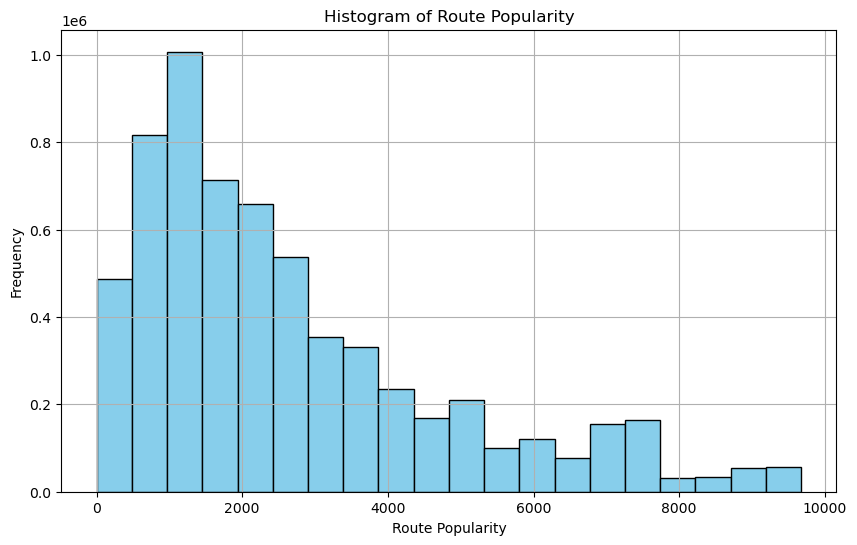

In [32]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_final['Route_Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Route Popularity')
plt.xlabel('Route Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Base Model

## 1. Copy Data

In [33]:
merged_final.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,dept-type,dept-elevation_ft,arr-type,arr-elevation_ft,Route_Popularity,Distance_Final
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,-2.0,0800-0859,2,0.0,medium_airport,2941.0,large_airport,1135.0,937.0,422.246813
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,-1.0,1000-1059,2,0.0,large_airport,1135.0,medium_airport,2941.0,937.0,422.246813
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,-2.0,1500-1559,4,0.0,large_airport,266.0,large_airport,672.0,918.0,1356.657710
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,-1.0,2000-2059,4,0.0,large_airport,607.0,large_airport,1519.0,568.0,1396.572313
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,-2.0,1900-1959,2,0.0,large_airport,1135.0,medium_airport,510.0,1135.0,684.252343


In [34]:
merged_final.shape

(6311871, 67)

Cancelled
False    6200853
True      111018
Name: count, dtype: int64


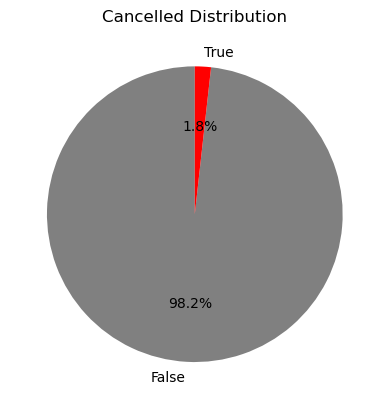

In [35]:
cancelled_counts = merged_final['Cancelled'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

## 2. Basic Feature Selection

In [36]:
print(merged_final.columns.tolist())

['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups'

In [37]:
all_column = ['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime',
                    'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime',
                    'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
                    'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
                    'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
                    'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline',
                    'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number',
                    'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID',
                    'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips',
                    'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
                    'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
                    'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
                    'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups',
                    'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings', 'dept-type', 'dept-elevation_ft',
                    'arr-type', 'arr-elevation_ft', 'Route_Popularity', 'Distance_Final']

In [38]:
potential_column = ['DayofMonth', 'DepDelayMinutes', 'Diverted', 'ActualElapsedTime', 'Year', 'Distance']

not_sure = ['Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
                    'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline',
                    'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline']
large_cat_columns = ['Flight_Number_Marketing_Airline','Tail_Number','Flight_Number_Operating_Airline']

In [39]:
column_to_filter = ['Airline', 'Origin', 'Dest', 'Cancelled', 'Quarter', 'Month',
                    'DayOfWeek','Operated_or_Branded_Code_Share_Partners',
                    'OriginState', 'DestState', 'DepTimeBlk', 'dept-type', 'dept-elevation_ft',
                    'arr-type', 'arr-elevation_ft', 'Route_Popularity', 'Distance_Final',
                    'FlightDate','CRSDepTime','OriginCityName','DepDelayMinutes']

In [40]:
# Filter the DataFrame to include only those columns
filtered_df = merged_final[column_to_filter]
filtered_df.head()

,Airline,Origin,Dest,Cancelled,Quarter,Month,DayOfWeek,Operated_or_Branded_Code_Share_Partners,OriginState,DestState,...,dept-type,dept-elevation_ft,arr-type,arr-elevation_ft,Route_Popularity,Distance_Final,FlightDate,CRSDepTime,OriginCityName,DepDelayMinutes
0,SkyWest Airlines Inc.,SGU,PHX,False,1,3,3,AA_CODESHARE,UT,AZ,...,medium_airport,2941.0,large_airport,1135.0,937.0,422.246813,2021-03-03,724,"St. George, UT",0.0
1,SkyWest Airlines Inc.,PHX,SGU,False,1,3,3,AA_CODESHARE,AZ,UT,...,large_airport,1135.0,medium_airport,2941.0,937.0,422.246813,2021-03-03,922,"Phoenix, AZ",0.0
2,SkyWest Airlines Inc.,MHT,ORD,False,1,3,3,AA_CODESHARE,NH,IL,...,large_airport,266.0,large_airport,672.0,918.0,1356.657710,2021-03-03,1330,"Manchester, NH",0.0
3,SkyWest Airlines Inc.,DFW,TRI,False,1,3,3,AA_CODESHARE,TX,TN,...,large_airport,607.0,large_airport,1519.0,568.0,1396.572313,2021-03-03,1645,"Dallas/Fort Worth, TX",0.0
4,SkyWest Airlines Inc.,PHX,BFL,False,1,3,3,AA_CODESHARE,AZ,CA,...,large_airport,1135.0,medium_airport,510.0,1135.0,684.252343,2021-03-03,1844,"Phoenix, AZ",0.0


In [41]:
filtered_df.nunique()

Airline                                      22
Origin                                      380
Dest                                        380
Cancelled                                     2
Quarter                                       4
Month                                        12
DayOfWeek                                     7
Operated_or_Branded_Code_Share_Partners      15
OriginState                                  53
DestState                                    53
DepTimeBlk                                   19
dept-type                                     4
dept-elevation_ft                           305
arr-type                                      4
arr-elevation_ft                            305
Route_Popularity                           2243
Distance_Final                             3553
FlightDate                                  365
CRSDepTime                                 1318
OriginCityName                              374
DepDelayMinutes                         

In [42]:
filtered_df.dtypes

Airline                                     object
Origin                                      object
Dest                                        object
Cancelled                                     bool
Quarter                                      int64
Month                                        int64
DayOfWeek                                    int64
Operated_or_Branded_Code_Share_Partners     object
OriginState                                 object
DestState                                   object
DepTimeBlk                                  object
dept-type                                   object
dept-elevation_ft                          float64
arr-type                                    object
arr-elevation_ft                           float64
Route_Popularity                           float64
Distance_Final                             float64
FlightDate                                  object
CRSDepTime                                   int64
OriginCityName                 

In [43]:
filtered_df.shape

(6311871, 21)

Cancelled
False    6200853
True      111018
Name: count, dtype: int64


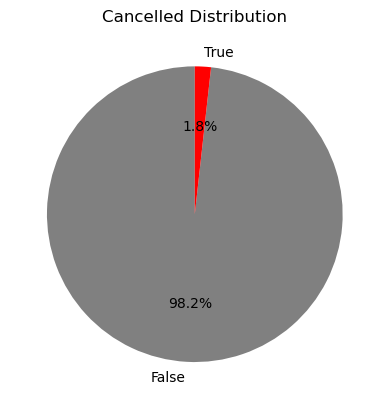

In [44]:
cancelled_counts = filtered_df['Cancelled'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

## 3. Drop Missing Values

In [45]:
filtered_df['DepDelayMinutes'].fillna(0, inplace=True)


/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_22084/672888188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['DepDelayMinutes'].fillna(0, inplace=True)
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_22084/672888188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DepDelayMinutes'].filln

In [46]:
filtered_df.dropna(inplace=True)

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_22084/724713040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


In [47]:
filtered_df.shape

(5963429, 21)

Cancelled
False    5856626
True      106803
Name: count, dtype: int64


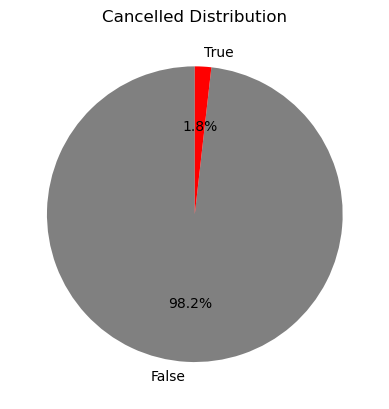

In [48]:
cancelled_counts = filtered_df['Cancelled'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

In [50]:
filtered_df.dtypes

Airline                                     object
Origin                                      object
Dest                                        object
Cancelled                                     bool
Quarter                                      int64
Month                                        int64
DayOfWeek                                    int64
Operated_or_Branded_Code_Share_Partners     object
OriginState                                 object
DestState                                   object
DepTimeBlk                                  object
dept-type                                   object
dept-elevation_ft                          float64
arr-type                                    object
arr-elevation_ft                           float64
Route_Popularity                           float64
Distance_Final                             float64
FlightDate                                  object
CRSDepTime                                   int64
OriginCityName                 

# EXPORT

In [51]:
filtered_df.to_csv('data/filtered_data.csv', index=False)


## 4. One Hot Encode

In [ ]:
### Filter columns to not have the Kernel die:
#additional_columns_to_filter = ['Origin', 'Dest']
#filtered_df = filtered_df.loc[:, ~filtered_df.columns.isin(additional_columns_to_filter)]

#REDUCE SIZE IF NEEDED
#filtered_df = filtered_df.sample(frac=0.1, random_state=123)
print(filtered_df.shape)

In [ ]:
filtered_df.dtypes

In [ ]:
filtered_df.head()

In [ ]:
# Select columns of type 'object'
object_cols = filtered_df.select_dtypes(include=['object']).columns

# Select non-object columns
non_object_cols = filtered_df.select_dtypes(exclude=['object'])

# One-hot encode the selected object columns
encoded_object_cols = pd.get_dummies(filtered_df[object_cols])

# Concatenate the non-object columns with the encoded object columns
encoded_df = pd.concat([non_object_cols, encoded_object_cols], axis=1)

encoded_df.shape

In [ ]:
encoded_df.describe()

# BLIND DATASET

In [ ]:
# Randomly select 20% of the rows to create the blind dataset
blind_dataset = encoded_df.sample(frac=0.2, random_state=123)

## 5. Downsampling

In [ ]:
from sklearn.utils import resample

# Step 2: Separate majority and minority classes from the remaining data
remaining_data = encoded_df.drop(blind_dataset.index)
data_majority = remaining_data[remaining_data['Cancelled'] == 0]
data_minority = remaining_data[remaining_data['Cancelled'] == 1]

# Step 3: Downsample the majority class
data_majority_downsampled = resample(data_majority, replace=False, n_samples=len(data_minority), random_state=123)

# Step 4: Combine minority class with downsampled majority class
data_downsampled = pd.concat([data_majority_downsampled, data_minority])

# Display new class counts
print(data_downsampled['Cancelled'].value_counts())

In [ ]:
data_downsampled.dtypes

## 6. Train Baseline Model

In [ ]:
X = data_downsampled.drop('Cancelled', axis=1)
y = data_downsampled['Cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, stratify = y)

# Initialize the Logistic Regression model
log_reg_downsampled = LogisticRegression(random_state = 123)

# Fit the model on the training data
log_reg_downsampled.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_downsampled.predict(X_test)

print("Test Validation:")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

In [ ]:
# Make predictions on the training set
y_pred = log_reg_downsampled.predict(X_train)

print("Train Validation:")

# Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision
precision = precision_score(y_train, y_pred)
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(y_train, y_pred)
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(y_train, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# Evaluate Base Line Model on BLIND Dataset

In [ ]:
y_pred = log_reg_downsampled.predict(blind_dataset.drop('Cancelled', axis=1))

# Confusion Matrix
conf_matrix = confusion_matrix(blind_dataset['Cancelled'], y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision
precision = precision_score(blind_dataset['Cancelled'], y_pred)
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(blind_dataset['Cancelled'], y_pred)
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(blind_dataset['Cancelled'], y_pred)
print("F1 Score: {:.2f}".format(f1))

# Accuracy
accuracy = accuracy_score(blind_dataset['Cancelled'], y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# NEXT MODELS

## Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X = data_downsampled.drop('Cancelled', axis=1)
y = data_downsampled['Cancelled']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto']
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=123)

# Initialize Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=skf, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using F1 score
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("F1 Score on Test Set:", f1)
